In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [3]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";")

In [4]:
train_data.head()

,Unnamed: 0,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [5]:
# Getting the name of the extra column
extra_col = list(general_data.columns)[0]
print(extra_col)

# Removing the extra column in every dataframe since it is redundant
general_data.drop(extra_col, axis=1, inplace=True)
customer_data.drop(extra_col, axis=1, inplace=True)
train_data.drop(extra_col, axis=1, inplace=True)
test_data.drop(extra_col, axis=1, inplace=True)

Unnamed: 0


In [6]:
train_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1,1.0,9.0,7.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,6.0,4.0,2.0,-1.0,9.0,2.0,3,0,1,4
3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


(array([42419.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

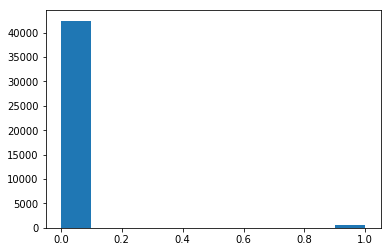

In [7]:
# Graphing the distribution of the RESPONSE variable for the training data
plt.hist(train_data["RESPONSE"])

In [8]:
# Calculating the percentage of positive outcomes for the training data
len(train_data[train_data["RESPONSE"]==1]) / len(train_data)

0.01238620753882331

In [8]:
# Using logistic regrsssion to create the benchmark model

# importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating the logistic regression model with lasso regularization
lr_baseline = LogisticRegression(penalty='l1',
                                 class_weight='balanced',
                                 solver='saga',
                                 max_iter=5000)

In [9]:
# Splitting the training data into features and labels
X_train = train_data.loc[:, train_data.columns != 'RESPONSE']
y_train = train_data['RESPONSE']

In [10]:
# Training the baseline model
lr_baseline.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Importing functions for calculating accuracy, precision, and recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [12]:
# Getting predictions for the training set
y_pred = lr_baseline.predict(X_train)

In [13]:
# Calculating the accuracy, precision, and recall
print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

The accuracy is 0.9442853484202929
The recall is 0.07142857142857142
The precision is 0.01961796592669076


In [14]:
# Viewing the coefficents learned by the model
coefs = lr_baseline.coef_
print(coefs)

[[ 1.84450348e-01 -2.06924868e-01 -1.83604229e-02 -9.67034363e-02
  -1.50974351e-01  9.89577340e-02  1.88435767e-01  5.75442949e-02
   1.31504100e-01  3.79114484e-02 -3.36496313e-03  1.09054392e-01
  -1.56563181e-01 -1.81927307e-02 -1.57574565e-01 -1.27913420e-01
   8.35027358e-02 -2.24811384e-02  3.93137707e-02  3.50727163e-02
   7.34860695e-02 -5.05263893e-02  2.34382399e-02  5.24743427e-02
   1.13680740e-01 -3.14355447e-01 -1.95534049e-02 -2.36826364e-01
   8.91601647e-02 -9.67143652e-02  1.61971528e-01 -1.19515914e-01
   1.61725556e-01 -8.70868310e-02 -1.54763680e-01  3.58326470e-03
  -7.61265840e-02 -7.82205095e-02 -5.99056671e-02  1.50698931e-01
   5.97688814e-02 -9.23379909e-02 -1.18042642e-01 -1.29907791e-01
   3.05467440e-01 -1.20192910e-01  1.27846796e-01  8.01296853e-03
   8.83863175e-02  4.45155169e-02 -1.21501853e-01 -4.80737431e-01
  -9.79039480e-01  8.73312352e-02 -8.09821994e-02 -1.08705632e-01
   1.09645954e-01 -1.65601828e-01  1.09122530e-01  5.31462755e-02
  -7.88138

In [15]:
print(len(coefs[0]))

358


In [38]:
# Splitting the training data into train and test to get an idea of the variance
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)
print(X_test.shape)

(4296, 358)


In [17]:
# Creating an random forest model with untuned hyperparameters

# Importing the random forest model from scikit learn
from sklearn.ensemble import RandomForestClassifier

# Creating the random forest model
rf_classifier = RandomForestClassifier(n_estimators=200,
                                       oob_score=True,
                                       class_weight='balanced')

In [18]:
# Training the random forest model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Calculating the accuracy, precision, and recall for the training set
y_pred = rf_classifier.predict(X_train)

print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

The accuracy is 0.9762773250549734
The recall is 0.920997920997921
The precision is 0.3350983358547655


In [20]:
# Getting the out of bag score
print(rf_classifier.oob_score_)

0.9652567585047213


In [21]:
# Calculating the evaluation metrics for the test data
y_pred = rf_classifier.predict(X_test)

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))

The accuracy is 0.9671787709497207
The recall is 0.058823529411764705
The precision is 0.03125


In [22]:
len(train_data[train_data["RESPONSE"]==1])

532

In [23]:
len(train_data[train_data["RESPONSE"]==0])

42419

In [24]:
42419 / 532

79.73496240601504

In [25]:
# Creating an gradient boosting model with untuned hyperparameters

# Importing the random forest model from scikit learn
from sklearn.ensemble import GradientBoostingClassifier

# Creating the random forest model
gb_classifier = GradientBoostingClassifier(n_estimators=200)

In [26]:
# Training the gradient boosting model
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
# Calculating the accuracy, precision, and recall for the training set
y_pred = gb_classifier.predict(X_train)

print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

The accuracy is 0.9885913853317811
The recall is 0.08316008316008316
The precision is 1.0


In [28]:
# Calculating the accuracy, precision, and recall for the test set
y_pred = gb_classifier.predict(X_test)

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))

The accuracy is 0.9871973929236499
The recall is 0.0
The precision is 0.0


In [11]:
# Importing the SMOTE class in order to oversample the positive class
from imblearn.over_sampling import SMOTE

# Creating the SMOTE model
smote = SMOTE()

In [12]:
# Redefining X_train and y_train to include all the training data that will be oversampled 
X_train = train_data.loc[:, train_data.columns != 'RESPONSE']
y_train = train_data['RESPONSE']

In [13]:
X_train.shape

(42951, 358)

In [14]:
# Fitting the SMOTE model to the training data and resampling the training data
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

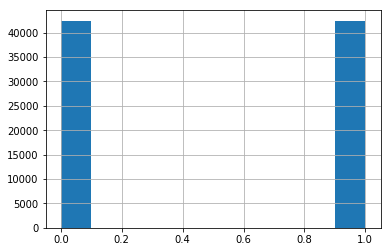

In [15]:
# Visualizing the new distribution of the RESPONSE column
y_train_over.hist()

In [17]:
# Re-training the random forest model to see if there is any change in the recall

# Creating a small test from the training data to get an idea of what the variance is
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_over, y_train_over, test_size=0.1)
print(X_test.shape)

# Importing the random forest model from scikit learn
from sklearn.ensemble import RandomForestClassifier

# Creating the random forest model
rf_classifier = RandomForestClassifier(n_estimators=200,
                                       oob_score=True)

(8484, 358)


In [18]:
# Training the random forest model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

In [19]:
# Calculating the accuracy, precision, and recall for the training set
y_pred = rf_classifier.predict(X_train)

print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

The accuracy is 0.948568509835765
The recall is 0.9199202350965575
The precision is 0.9756504800333936


In [20]:
# Calculating the evaluation metrics for the test data
y_pred = rf_classifier.predict(X_test)

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))

The accuracy is 0.9414191419141914
The recall is 0.9071279312746692
The precision is 0.9757742257742258


In [21]:
# Repeating the process for the gbm and xgb models
# Creating an gradient boosting model with untuned hyperparameters

# Importing the random forest model from scikit learn
from sklearn.ensemble import GradientBoostingClassifier

# Creating the random forest model
gb_classifier = GradientBoostingClassifier(n_estimators=200)

# Training the gradient boosting model
gb_classifier.fit(X_train, y_train)

# Calculating the accuracy, precision, and recall for the training set
y_pred = gb_classifier.predict(X_train)

print("The accuracy is", accuracy_score(y_train, y_pred))
print("The recall is", recall_score(y_train, y_pred))
print("The precision is", precision_score(y_train, y_pred))

# Calculating the accuracy, precision, and recall for the test set
y_pred = gb_classifier.predict(X_test)

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))

The accuracy is 0.9431463970453414
The recall is 0.9090575146935348
The precision is 0.975366684496495
The accuracy is 0.9411834040546911
The recall is 0.9071279312746692
The precision is 0.9752870693959061
